In [1]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import zipfile
import fiona 
import fiona; help(fiona.open)
import re
from io import BytesIO
import os
import calendar
import glob

Help on function open in module fiona:

open(fp, mode='r', driver=None, schema=None, crs=None, encoding=None, layer=None, vfs=None, enabled_drivers=None, crs_wkt=None, allow_unsupported_drivers=False, **kwargs)
    Open a collection for read, append, or write
    
    In write mode, a driver name such as "ESRI Shapefile" or "GPX" (see
    OGR docs or ``ogr2ogr --help`` on the command line) and a schema
    mapping such as:
    
      {'geometry': 'Point',
       'properties': [('class', 'int'), ('label', 'str'),
                      ('value', 'float')]}
    
    must be provided. If a particular ordering of properties ("fields"
    in GIS parlance) in the written file is desired, a list of (key,
    value) pairs as above or an ordered dict is required. If no ordering
    is needed, a standard dict will suffice.
    
    A coordinate reference system for collections in write mode can be
    defined by the ``crs`` parameter. It takes Proj4 style mappings like
    
      {'proj': 'longla

In [2]:
files_dir = os.listdir()
shps_files = []
for file in files_dir:
    if "polygon_dissolved.shp" in file:
        if "xml" in file:
            continue
        else:
            shps_files.append(file)
print(shps_files)
print("\n")
print("Final Count of shapefile eclipses: ", len(shps_files))

['HSE_2005_04_08_polygon_dissolved.shp', 'HSE_2013_11_03_polygon_dissolved.shp', 'HSE_2023_04_20_polygon_dissolved.shp', 'HSE_2031_11_14_polygon_dissolved.shp', 'HSE_2049_11_25_polygon_dissolved.shp', 'HSE_2050_05_20_polygon_dissolved.shp', 'TSE_1961_02_15_polygon_dissolved.shp', 'TSE_1968_09_22_polygon_dissolved.shp', 'TSE_1970_03_07_polygon_dissolved.shp', 'TSE_1972_07_10_polygon_dissolved.shp', 'TSE_1973_06_30_polygon_dissolved.shp', 'TSE_1979_02_26_polygon_dissolved.shp', 'TSE_1988_03_18_polygon_dissolved.shp', 'TSE_1990_07_22_polygon_dissolved.shp', 'TSE_1991_07_11_polygon_dissolved.shp', 'TSE_1992_06_30_polygon_dissolved.shp', 'TSE_1994_11_03_polygon_dissolved.shp', 'TSE_1995_10_24_polygon_dissolved.shp', 'TSE_1997_03_09_polygon_dissolved.shp', 'TSE_1998_02_26_polygon_dissolved.shp', 'TSE_1999_08_11_polygon_dissolved.shp', 'TSE_2001_06_21_polygon_dissolved.shp', 'TSE_2002_12_04_polygon_dissolved.shp', 'TSE_2003_11_23_polygon_dissolved.shp', 'TSE_2006_03_29_polygon_dissolved.shp',

In [3]:
HSE_2005 = shps_files[10]

df = gpd.read_file(HSE_2005)
print(df)

   Id                                           geometry
0   0  POLYGON Z ((7.95574 19.37646 0.00000, 8.03934 ...


<Axes: >

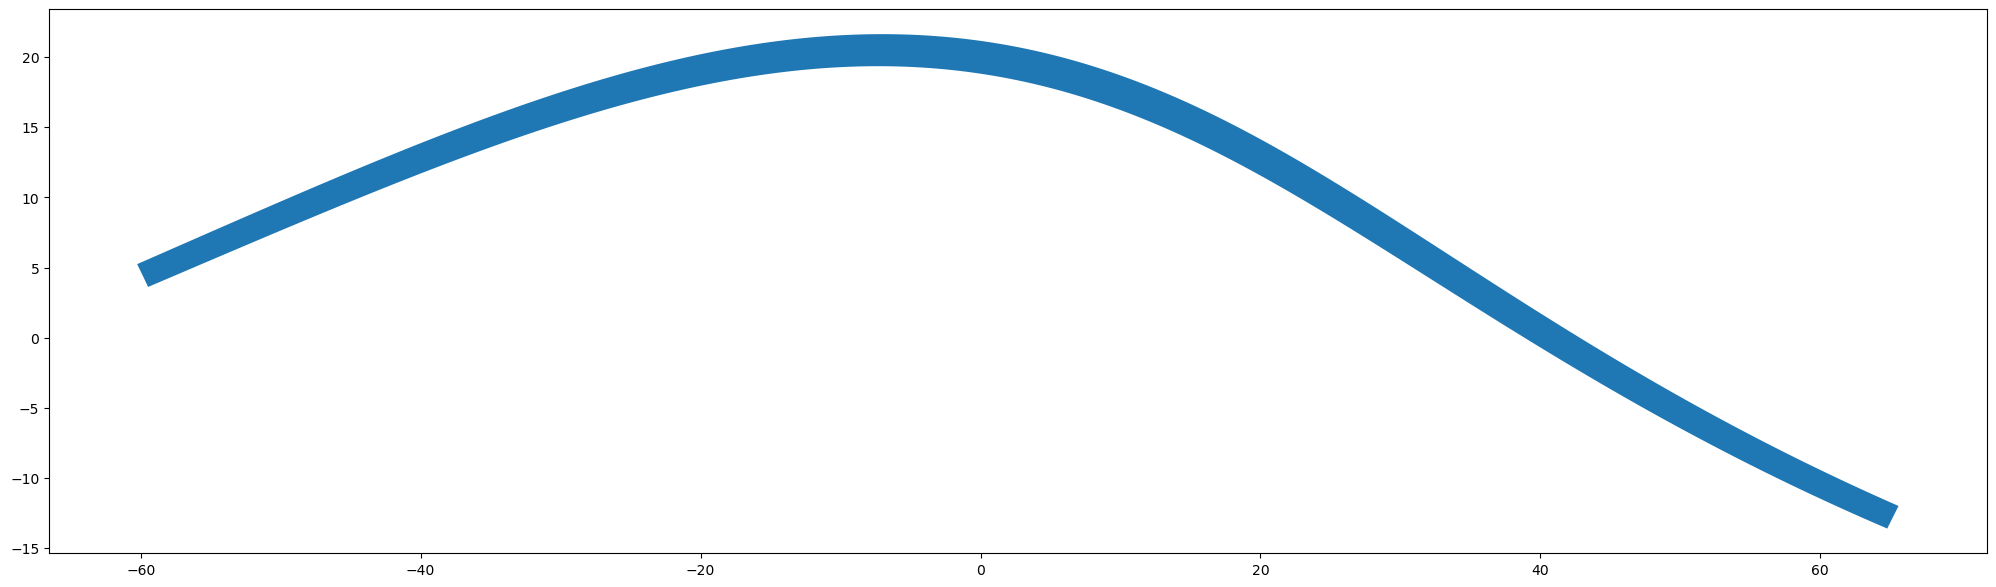

In [4]:
df.plot(figsize=(25,15))

In [5]:
df

,Id,geometry
0,0,"POLYGON Z ((7.95574 19.37646 0.00000, 8.03934 ..."


# Add in an attribute for the type of eclipse and the date that it happened

In [6]:
# empty geoedataframe
#final_gdf = gpd.GeoDataFrame(columns = ['ID', 'geometry', 'Eclipse Type', 'Eclipse Date'], crs="EPSG:4326")
final_df = pd.DataFrame(columns= ['Id', 'geometry', 'Eclipse Date', 'Eclipse Type'])

for file in shps_files:
    eclipse_type = file[0:3]
    eclipse_date = file[4:14]
    eclipse_date = eclipse_date.replace("_", " ")
    
    
    #print("Eclipse Type: ", eclipse_type)
    #print("Eclipse Date: ", eclipse_date)
        
    gdf = gpd.read_file(file)
    
    gdf['Eclipse Date'] = eclipse_date
    
    if eclipse_type == 'HSE':
        gdf['Eclipse Type'] = 'Hybrid Solar Eclipse'
    elif eclipse_type == 'TSE':
        gdf['Eclipse Type'] = 'Total Solar Eclipse'
    
    df = pd.DataFrame(gdf)
    
    final_df = pd.concat([final_df, df], ignore_index=True)


print(final_df)

   Id                                           geometry Eclipse Date  \
0   0  POLYGON Z ((-71.15510 8.49954 0.00000, -71.048...   2005 04 08   
1   0  POLYGON Z ((8.66571 -0.22225 0.00000, 8.77384 ...   2013 11 03   
2   0  POLYGON Z ((179.67246 3.27654 0.00000, 180.000...   2023 04 20   
3   0  POLYGON Z ((179.74799 19.88169 0.00000, 180.00...   2031 11 14   
4   0  POLYGON Z ((102.28645 -4.29167 0.00000, 102.36...   2049 11 25   
.. ..                                                ...          ...   
63  0  POLYGON Z ((12.27188 47.92846 0.00000, 12.5836...   2081 09 03   
64  0  POLYGON Z ((2.00701 47.09639 0.00000, 1.18228 ...   2090 09 23   
65  0  POLYGON Z ((16.40645 -58.39796 0.00000, 74.646...   2094 01 16   
66  0  POLYGON Z ((5.83192 84.57408 0.00000, 7.17064 ...   2097 05 11   
67  0  MULTIPOLYGON Z (((-144.93489 51.39338 0.00000,...   2099 09 14   

            Eclipse Type  
0   Hybrid Solar Eclipse  
1   Hybrid Solar Eclipse  
2   Hybrid Solar Eclipse  
3   Hybrid Sola

# converting pandas df to geopandas gdf

In [7]:
final_gdf = gpd.GeoDataFrame(final_df, geometry=final_df['geometry'],crs="EPSG:4326")
final_gdf

,Id,geometry,Eclipse Date,Eclipse Type
0,0,"POLYGON Z ((-71.15510 8.49954 0.00000, -71.048...",2005 04 08,Hybrid Solar Eclipse
1,0,"POLYGON Z ((8.66571 -0.22225 0.00000, 8.77384 ...",2013 11 03,Hybrid Solar Eclipse
2,0,"POLYGON Z ((179.67246 3.27654 0.00000, 180.000...",2023 04 20,Hybrid Solar Eclipse
3,0,"POLYGON Z ((179.74799 19.88169 0.00000, 180.00...",2031 11 14,Hybrid Solar Eclipse
4,0,"POLYGON Z ((102.28645 -4.29167 0.00000, 102.36...",2049 11 25,Hybrid Solar Eclipse
...,...,...,...,...
63,0,"POLYGON Z ((12.27188 47.92846 0.00000, 12.5836...",2081 09 03,Total Solar Eclipse
64,0,"POLYGON Z ((2.00701 47.09639 0.00000, 1.18228 ...",2090 09 23,Total Solar Eclipse
65,0,"POLYGON Z ((16.40645 -58.39796 0.00000, 74.646...",2094 01 16,Total Solar Eclipse
66,0,"POLYGON Z ((5.83192 84.57408 0.00000, 7.17064 ...",2097 05 11,Total Solar Eclipse


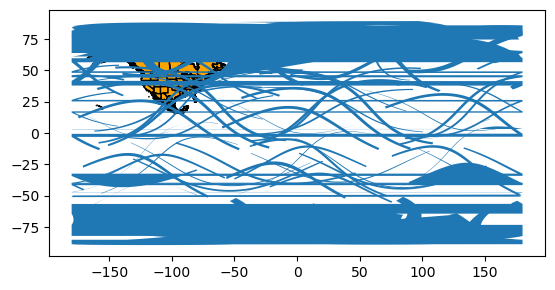

In [8]:
north_america = gpd.read_file(r'D:\Side Projects\Map Portfolio\Map 12 Number of Native Speakers per state\NorthAmrican_states_merged_v2.shp')

fig, ax = plt.subplots()
ax.set_aspect('equal')

north_america.plot(ax=ax, color='orange', edgecolor='black', figsize=(25,20))
final_gdf.plot(ax=ax)

plt.show();

In [9]:
eclipse_clip= gpd.sjoin(north_america, final_gdf, op="intersects")
eclipse_clip

C:\Users\luisg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,name,country,stateabb,geometry,index_right,Id,Eclipse Date,Eclipse Type
0,Aguascalientes,MEX,MX-AGU,"POLYGON ((-101.88791 21.94428, -101.88834 21.9...",14,0,1991 07 11,Total Solar Eclipse
7,Baja California Sur,MEX,MX-BCS,"MULTIPOLYGON (((-109.79843 24.15516, -109.8014...",14,0,1991 07 11,Total Solar Eclipse
11,Chiapas,MEX,MX-CHP,"MULTIPOLYGON (((-94.03120 16.02792, -94.01755 ...",14,0,1991 07 11,Total Solar Eclipse
19,Ciudad de Mexico,MEX,NaN,"POLYGON ((-98.96909 19.07235, -98.99225 19.078...",14,0,1991 07 11,Total Solar Eclipse
20,Durango,MEX,MX-DUR,"POLYGON ((-103.64525 26.69695, -103.59107 26.6...",14,0,1991 07 11,Total Solar Eclipse
...,...,...,...,...,...,...,...,...
66,Oregon,USA,US-OR,"POLYGON ((-123.48751 46.23063, -123.48416 46.2...",11,0,1979 02 26,Total Solar Eclipse
70,Quebec,CAN,CA-QC,"MULTIPOLYGON (((-73.93806 45.31025, -73.94831 ...",11,0,1979 02 26,Total Solar Eclipse
76,Saskatchewan,CAN,CA-SK,"POLYGON ((-102.00000 60.00000, -101.99988 59.9...",11,0,1979 02 26,Total Solar Eclipse
90,Washington,USA,US-WA,"MULTIPOLYGON (((-122.86582 47.17353, -122.8746...",11,0,1979 02 26,Total Solar Eclipse


In [10]:
eclipse_clip['Eclipse Type'].unique()

array(['Total Solar Eclipse', 'Hybrid Solar Eclipse'], dtype=object)

In [11]:
from shapely.geometry import Polygon

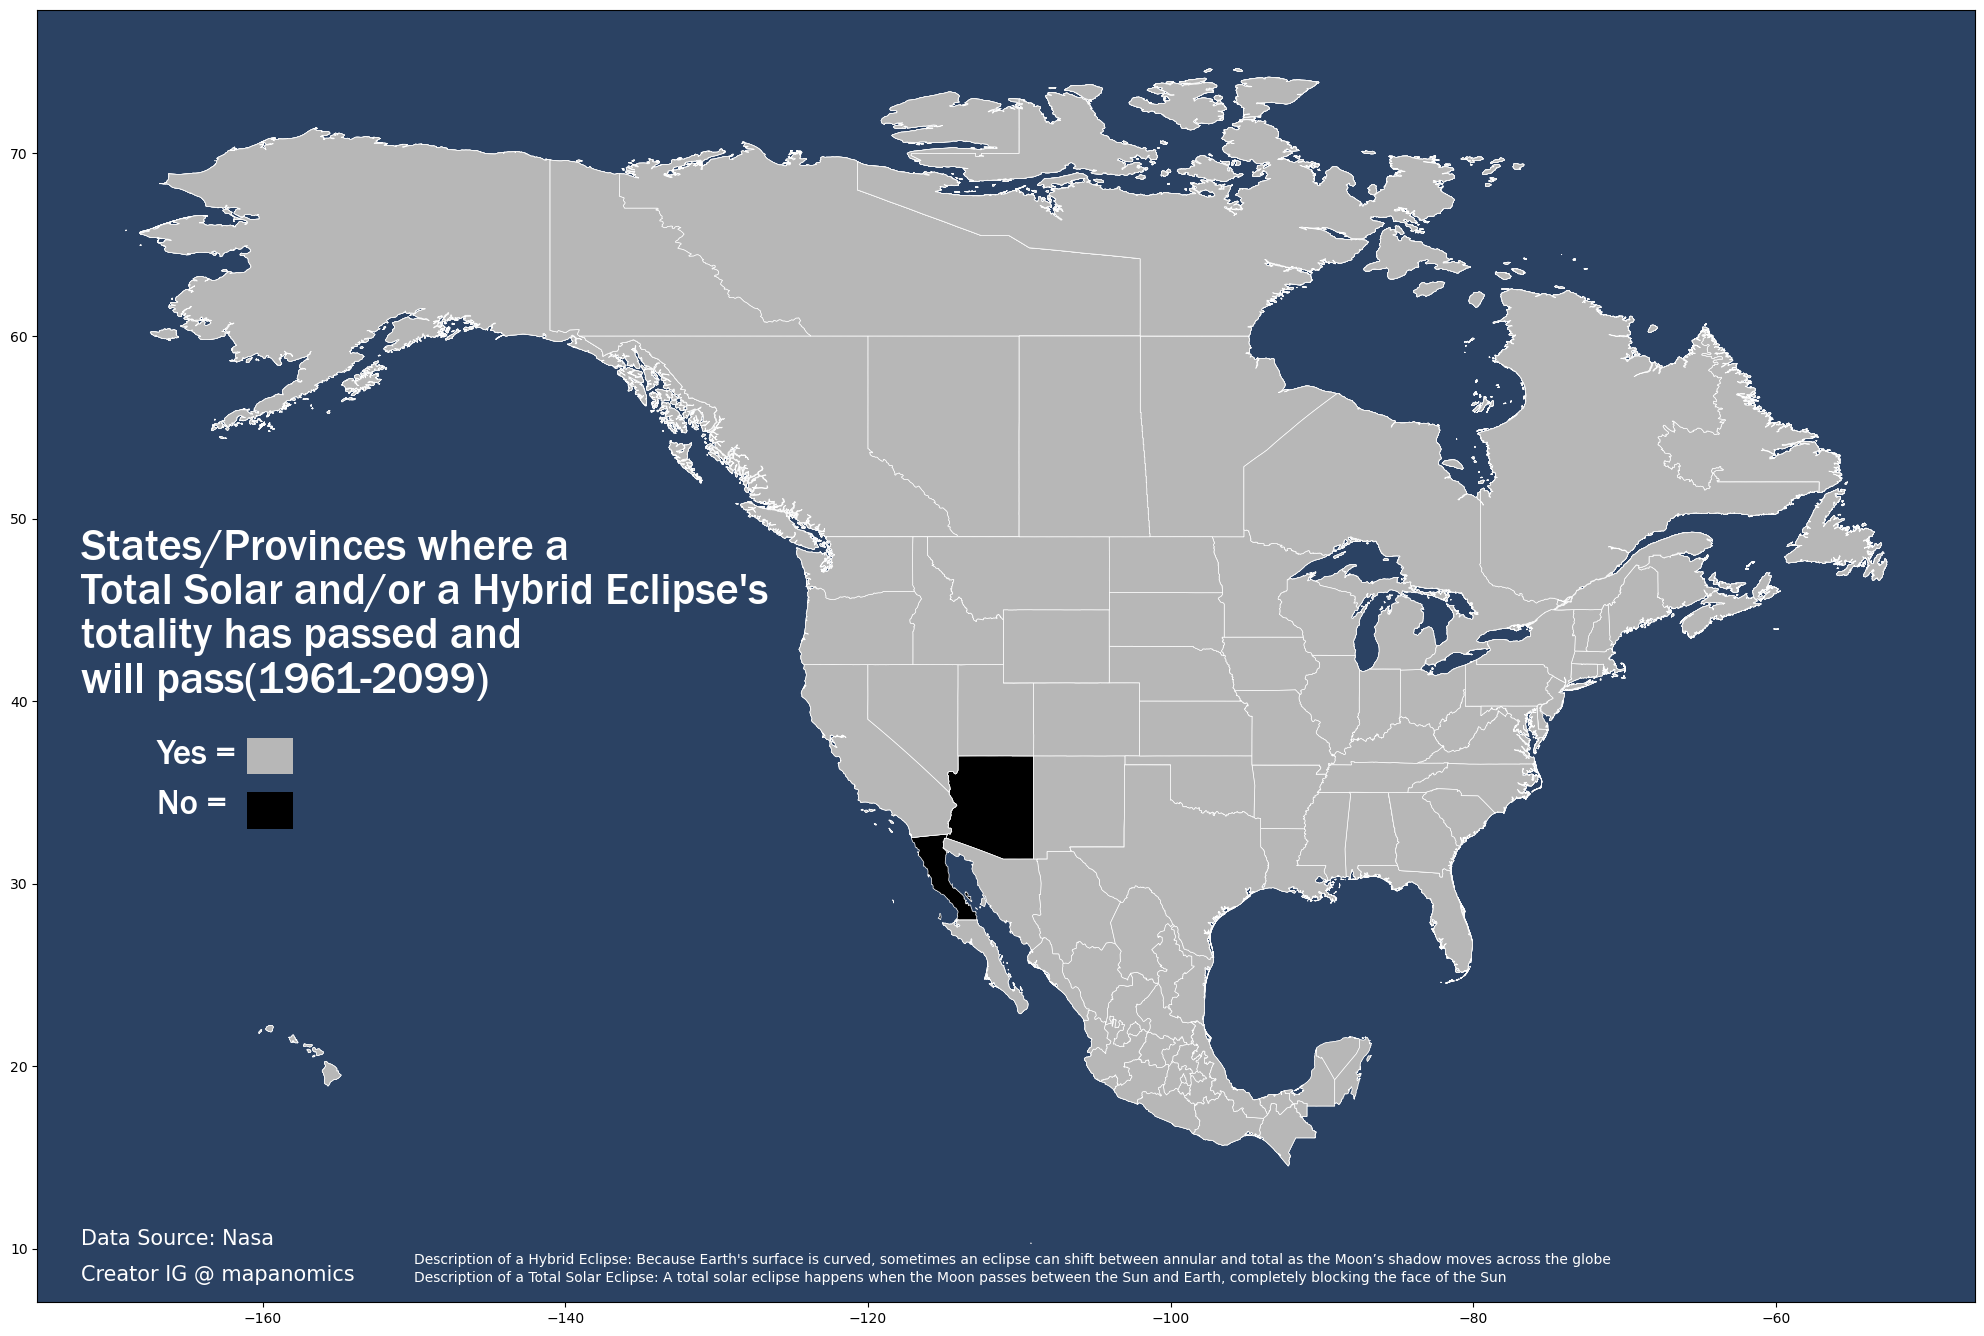

In [12]:
ax= north_america.plot(color='black', edgecolor='white',linewidth=0.5, figsize=(25,17))
eclipse_clip.plot(ax=ax, color='#B7B7B7', edgecolor='white',linewidth=0.5)

leg_args = {'loc':'best', 
            'bbox_to_anchor':(0.15, 0., 0.04, 0.45),
            'labelcolor':'white',
            'edgecolor':'#5A5A5A',
            'facecolor':'#5A5A5A',
            'fontsize':'large',
            'prop': {'size': 15}}

# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon1 = Polygon([(-161,36),(-161,38),(-158, 38),(-158,36)])
box= gpd.GeoDataFrame(geometry=[polygon1], crs=north_america.crs)
box.plot(ax=ax, color= '#B7B7B7')
ax.annotate('Yes =',xy=(-167,36.25), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

polygon2 = Polygon([(-161,33),(-161,35),(-158, 35),(-158,33)])
box1= gpd.GeoDataFrame(geometry=[polygon2], crs=north_america.crs)
box1.plot(ax=ax, color= 'black')
ax.annotate('No =',xy=(-167,33.5), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

ax.annotate("States/Provinces where a\nTotal Solar and/or a Hybrid Eclipse's\ntotality has passed and\nwill pass(1961-2099)",
            xy=(-172,40), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=32, color='white')
ax.set_facecolor('#2B4263')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')


plt.savefig('Eclipse Yes No.png',pad_inches = 3,facecolor ="black",dpi=60)  

In [13]:
eclipse_clip[eclipse_clip['Eclipse Type'] == 'Total Solar Eclipse']

,name,country,stateabb,geometry,index_right,Id,Eclipse Date,Eclipse Type
0,Aguascalientes,MEX,MX-AGU,"POLYGON ((-101.88791 21.94428, -101.88834 21.9...",14,0,1991 07 11,Total Solar Eclipse
7,Baja California Sur,MEX,MX-BCS,"MULTIPOLYGON (((-109.79843 24.15516, -109.8014...",14,0,1991 07 11,Total Solar Eclipse
11,Chiapas,MEX,MX-CHP,"MULTIPOLYGON (((-94.03120 16.02792, -94.01755 ...",14,0,1991 07 11,Total Solar Eclipse
19,Ciudad de Mexico,MEX,NaN,"POLYGON ((-98.96909 19.07235, -98.99225 19.078...",14,0,1991 07 11,Total Solar Eclipse
20,Durango,MEX,MX-DUR,"POLYGON ((-103.64525 26.69695, -103.59107 26.6...",14,0,1991 07 11,Total Solar Eclipse
...,...,...,...,...,...,...,...,...
66,Oregon,USA,US-OR,"POLYGON ((-123.48751 46.23063, -123.48416 46.2...",11,0,1979 02 26,Total Solar Eclipse
70,Quebec,CAN,CA-QC,"MULTIPOLYGON (((-73.93806 45.31025, -73.94831 ...",11,0,1979 02 26,Total Solar Eclipse
76,Saskatchewan,CAN,CA-SK,"POLYGON ((-102.00000 60.00000, -101.99988 59.9...",11,0,1979 02 26,Total Solar Eclipse
90,Washington,USA,US-WA,"MULTIPOLYGON (((-122.86582 47.17353, -122.8746...",11,0,1979 02 26,Total Solar Eclipse


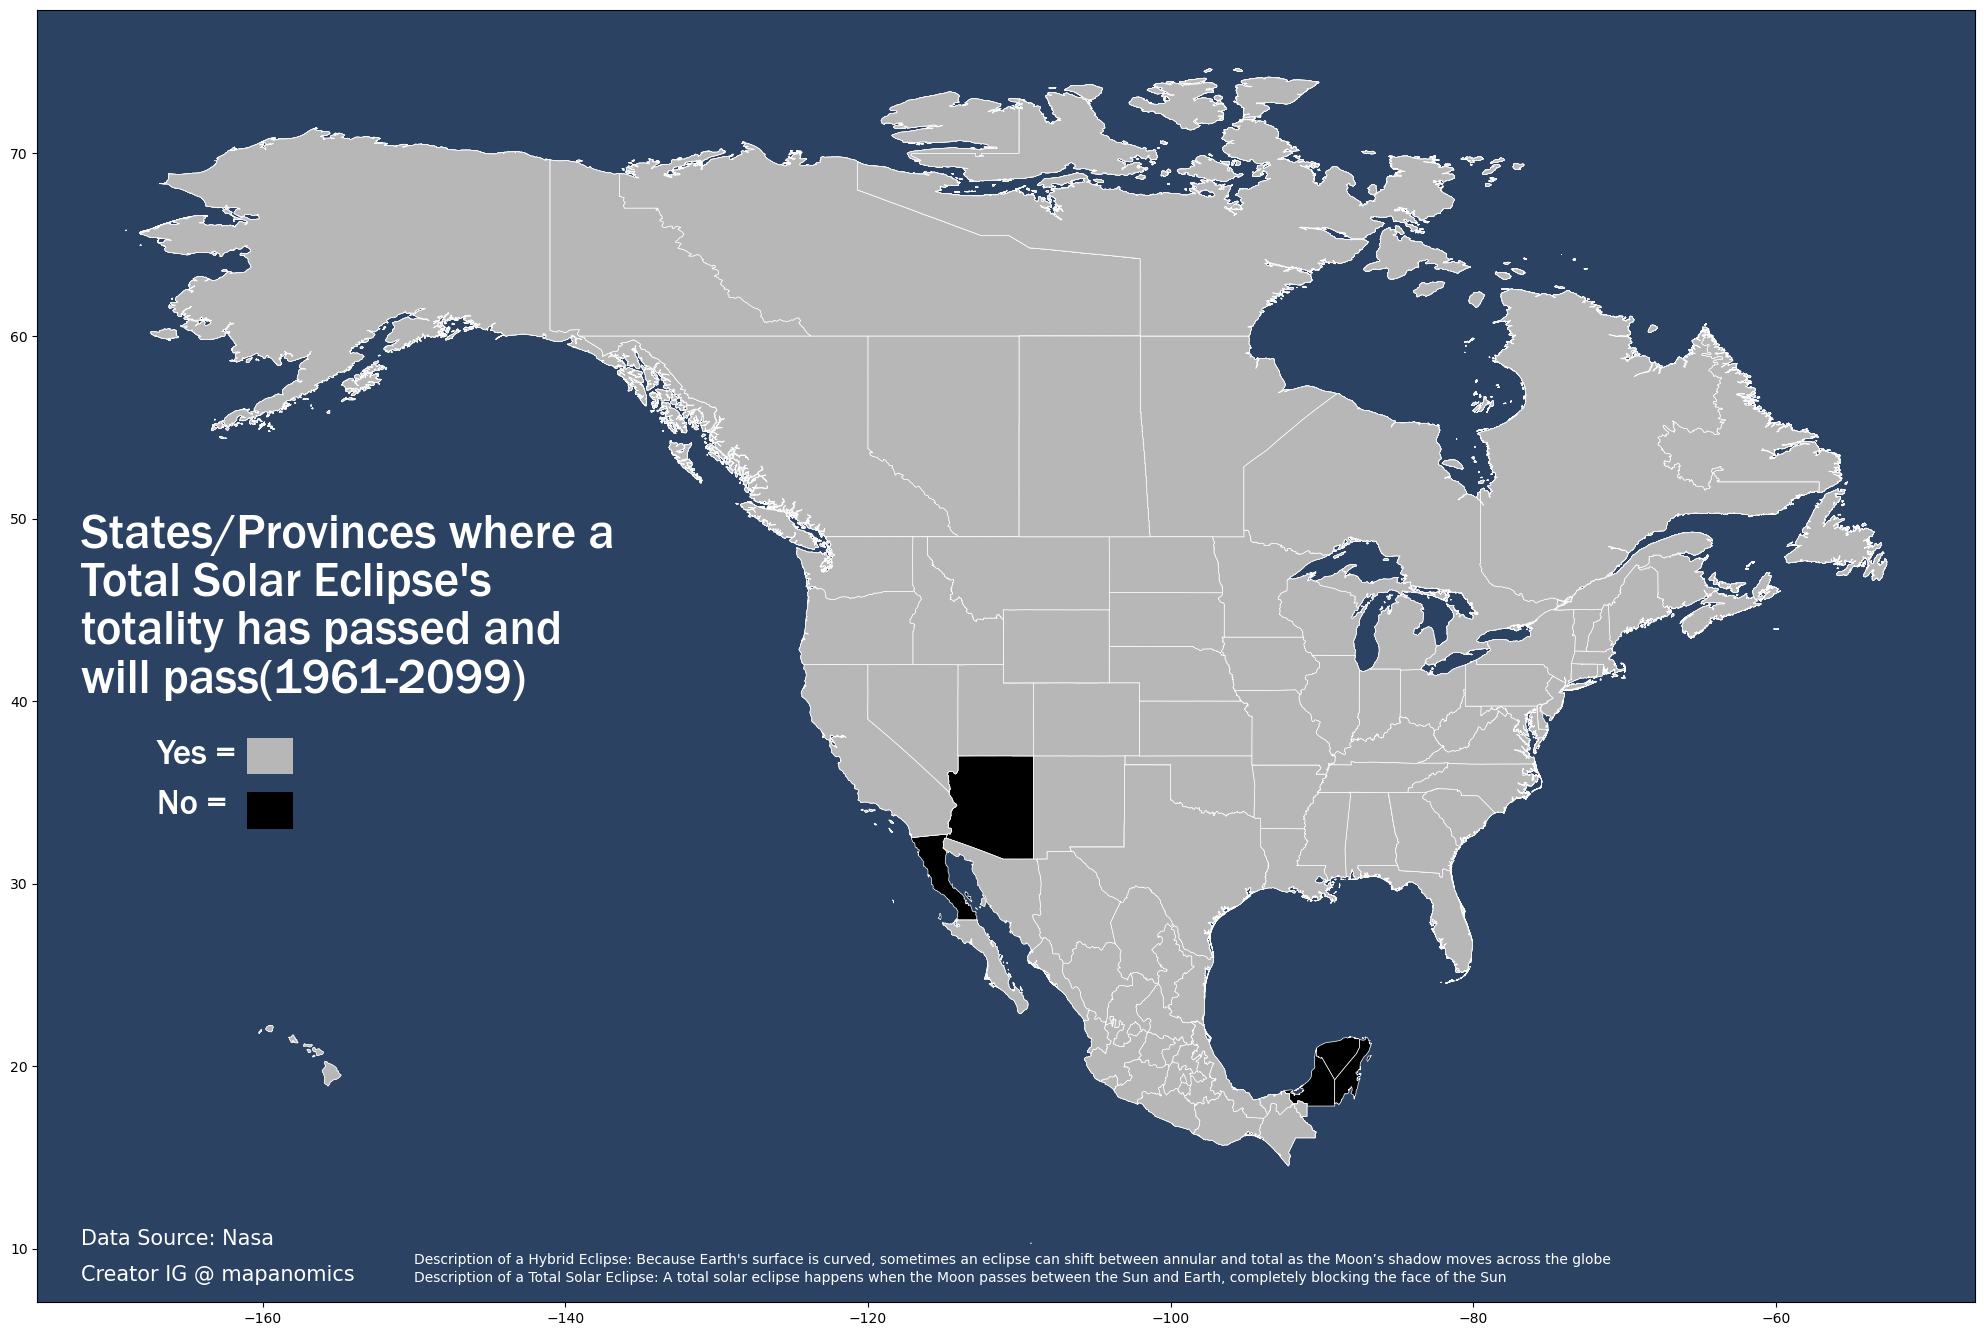

In [14]:
ax= north_america.plot(color='black', edgecolor='white',linewidth=0.5, figsize=(25,17))
eclipse_clip[eclipse_clip['Eclipse Type'] == 'Total Solar Eclipse'].plot(ax=ax, color='#B7B7B7', edgecolor='white',linewidth=0.5)

leg_args = {'loc':'best', 
            'bbox_to_anchor':(0.15, 0., 0.04, 0.45),
            'labelcolor':'white',
            'edgecolor':'#5A5A5A',
            'facecolor':'#5A5A5A',
            'fontsize':'large',
            'prop': {'size': 15}}

# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon1 = Polygon([(-161,36),(-161,38),(-158, 38),(-158,36)])
box= gpd.GeoDataFrame(geometry=[polygon1], crs=north_america.crs)
box.plot(ax=ax, color= '#B7B7B7')
ax.annotate('Yes =',xy=(-167,36.25), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

polygon2 = Polygon([(-161,33),(-161,35),(-158, 35),(-158,33)])
box1= gpd.GeoDataFrame(geometry=[polygon2], crs=north_america.crs)
box1.plot(ax=ax, color= 'black')
ax.annotate('No =',xy=(-167,33.5), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

ax.annotate("States/Provinces where a\nTotal Solar Eclipse's\ntotality has passed and\nwill pass(1961-2099)",
            xy=(-172,40), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=35, color='white')
ax.set_facecolor('#2B4263')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')


plt.savefig('Total Eclipse Yes No.png',pad_inches = 3,facecolor ="black",dpi=60)  

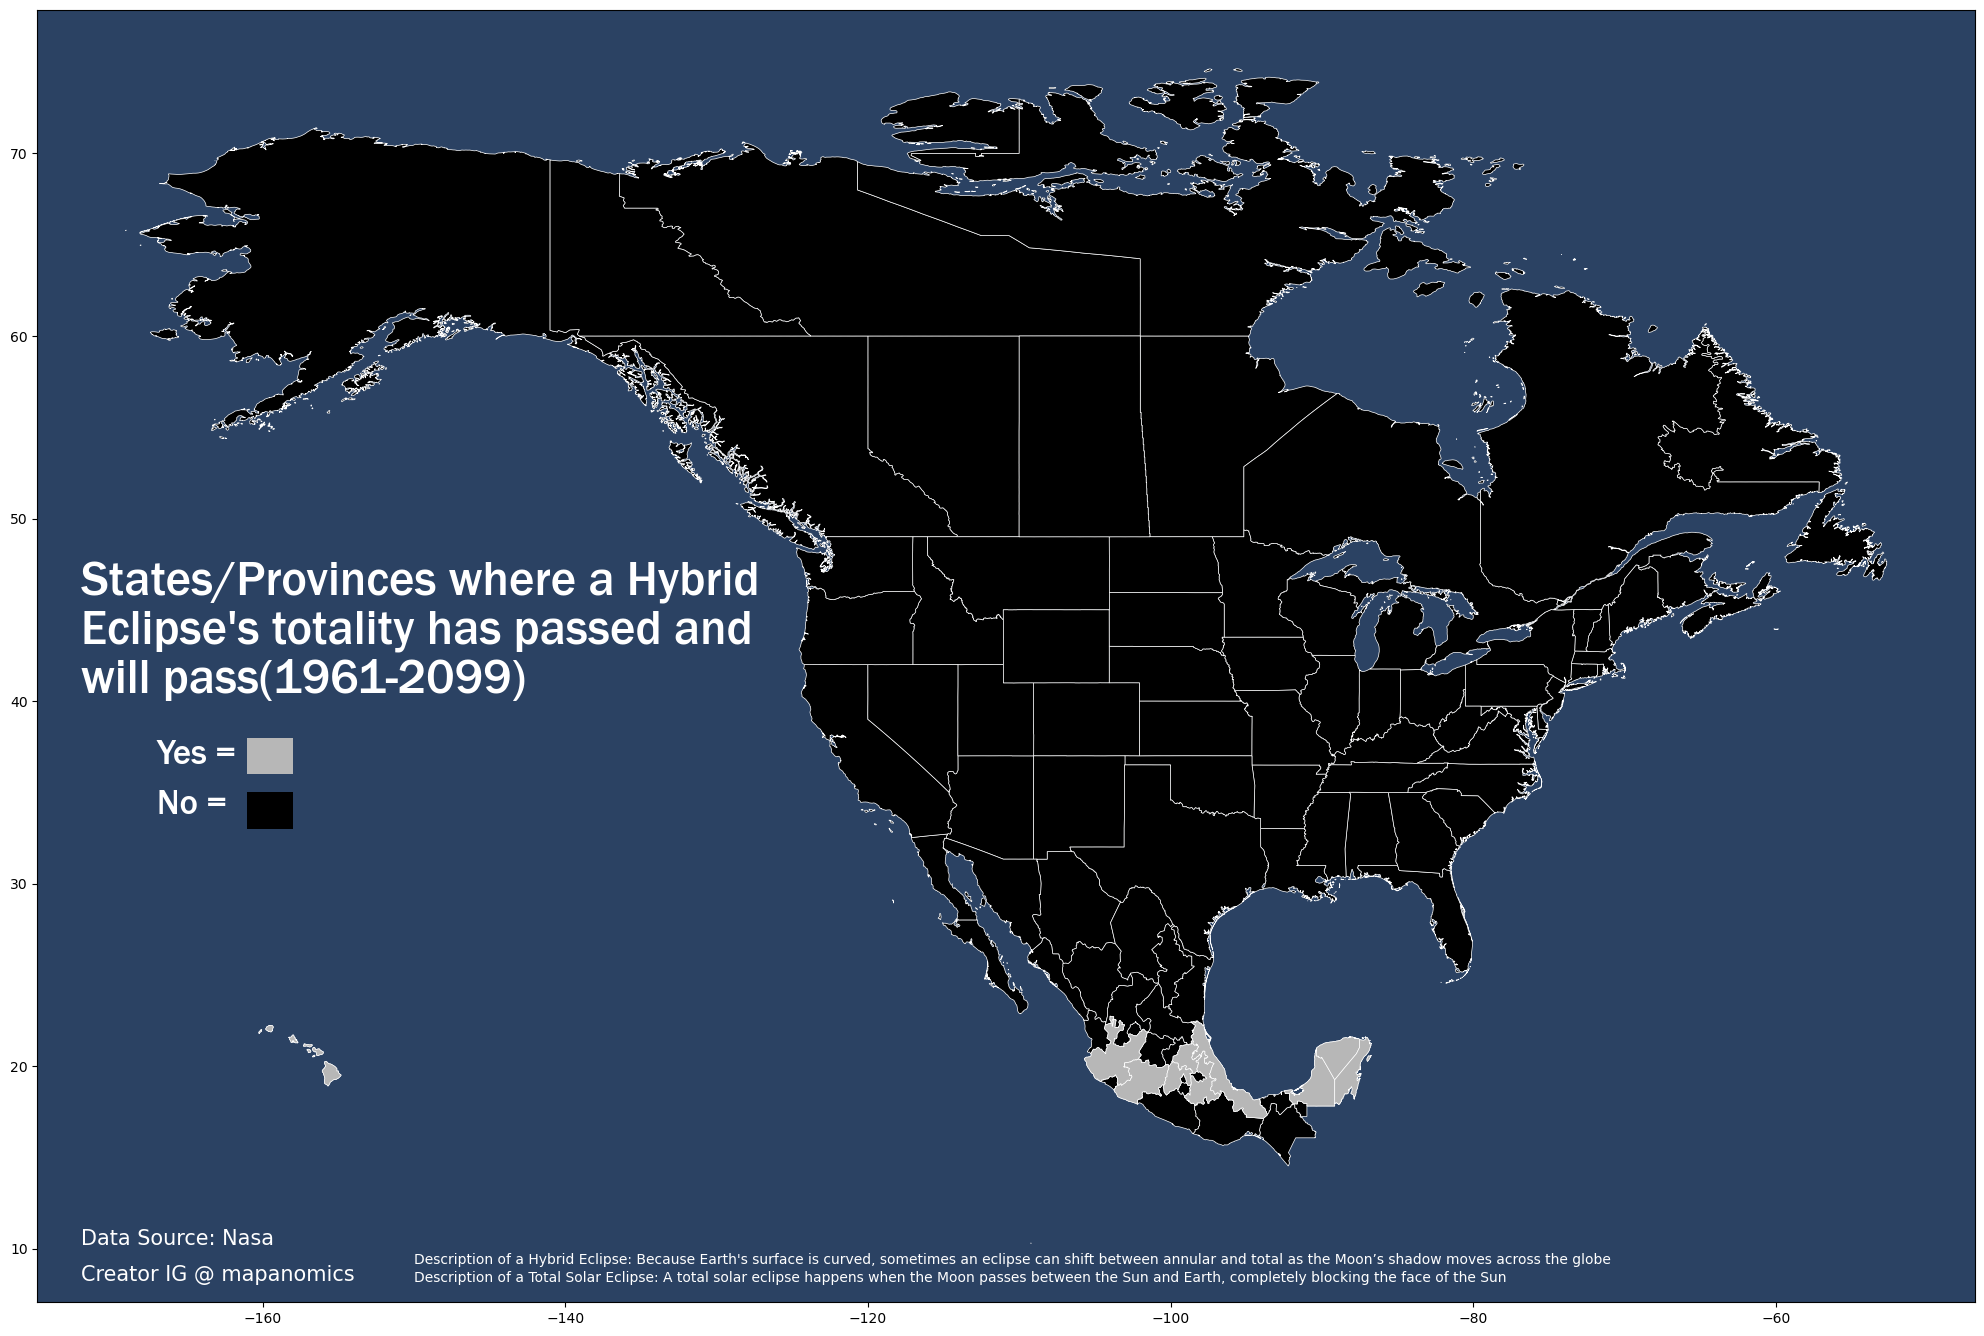

In [15]:
ax= north_america.plot(color='black', edgecolor='white',linewidth=0.5, figsize=(25,17))
eclipse_clip[eclipse_clip['Eclipse Type'] == 'Hybrid Solar Eclipse'].plot(ax=ax, color='#B7B7B7', edgecolor='white',linewidth=0.5)

leg_args = {'loc':'best', 
            'bbox_to_anchor':(0.15, 0., 0.04, 0.45),
            'labelcolor':'white',
            'edgecolor':'#5A5A5A',
            'facecolor':'#5A5A5A',
            'fontsize':'large',
            'prop': {'size': 15}}

# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon1 = Polygon([(-161,36),(-161,38),(-158, 38),(-158,36)])
box= gpd.GeoDataFrame(geometry=[polygon1], crs=north_america.crs)
box.plot(ax=ax, color= '#B7B7B7')
ax.annotate('Yes =',xy=(-167,36.25), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

polygon2 = Polygon([(-161,33),(-161,35),(-158, 35),(-158,33)])
box1= gpd.GeoDataFrame(geometry=[polygon2], crs=north_america.crs)
box1.plot(ax=ax, color= 'black')
ax.annotate('No =',xy=(-167,33.5), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=25, color='white')

ax.annotate("States/Provinces where a Hybrid\nEclipse's totality has passed and\nwill pass(1961-2099)",
            xy=(-172,40), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=35, color='white')
ax.set_facecolor('#2B4263')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='white')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='white')


plt.savefig('Hybrid Eclipse Yes No.png',pad_inches = 3,facecolor ="black",dpi=60)  

# Dissolve intersected data to obtain a number per state


In [16]:
eclipse_clip['name_1'] = eclipse_clip['name']
eclipse_clip

,name,country,stateabb,geometry,index_right,Id,Eclipse Date,Eclipse Type,name_1
0,Aguascalientes,MEX,MX-AGU,"POLYGON ((-101.88791 21.94428, -101.88834 21.9...",14,0,1991 07 11,Total Solar Eclipse,Aguascalientes
7,Baja California Sur,MEX,MX-BCS,"MULTIPOLYGON (((-109.79843 24.15516, -109.8014...",14,0,1991 07 11,Total Solar Eclipse,Baja California Sur
11,Chiapas,MEX,MX-CHP,"MULTIPOLYGON (((-94.03120 16.02792, -94.01755 ...",14,0,1991 07 11,Total Solar Eclipse,Chiapas
19,Ciudad de Mexico,MEX,NaN,"POLYGON ((-98.96909 19.07235, -98.99225 19.078...",14,0,1991 07 11,Total Solar Eclipse,Ciudad de Mexico
20,Durango,MEX,MX-DUR,"POLYGON ((-103.64525 26.69695, -103.59107 26.6...",14,0,1991 07 11,Total Solar Eclipse,Durango
...,...,...,...,...,...,...,...,...,...
66,Oregon,USA,US-OR,"POLYGON ((-123.48751 46.23063, -123.48416 46.2...",11,0,1979 02 26,Total Solar Eclipse,Oregon
70,Quebec,CAN,CA-QC,"MULTIPOLYGON (((-73.93806 45.31025, -73.94831 ...",11,0,1979 02 26,Total Solar Eclipse,Quebec
76,Saskatchewan,CAN,CA-SK,"POLYGON ((-102.00000 60.00000, -101.99988 59.9...",11,0,1979 02 26,Total Solar Eclipse,Saskatchewan
90,Washington,USA,US-WA,"MULTIPOLYGON (((-122.86582 47.17353, -122.8746...",11,0,1979 02 26,Total Solar Eclipse,Washington


In [17]:
eclipse_clip_dissolved  = eclipse_clip.dissolve(
     by="name",
     aggfunc={
         "Eclipse Type": "count"
     },
 )
eclipse_clip_dissolved.head(55)


,geometry,Eclipse Type
name,,
Aguascalientes,"POLYGON ((-101.88834 21.93596, -101.88740 21.9...",3
Alabama,"MULTIPOLYGON (((-88.13898 30.24508, -88.18787 ...",3
Alaska,"MULTIPOLYGON (((-165.87629 60.34340, -165.7227...",4
Alberta,"POLYGON ((-110.00000 59.94582, -110.00000 59.8...",5
Arkansas,"POLYGON ((-89.71706 36.00117, -89.72022 35.990...",2
Baja California Sur,"MULTIPOLYGON (((-111.46396 24.33018, -111.5328...",2
British Columbia,"MULTIPOLYGON (((-130.96691 52.06794, -130.9837...",5
California,"MULTIPOLYGON (((-119.46220 33.25654, -119.4433...",2
Campeche,"MULTIPOLYGON (((-91.52880 18.75528, -91.53205 ...",1


# Create chloropleth map of Number of Eclipses with Totality

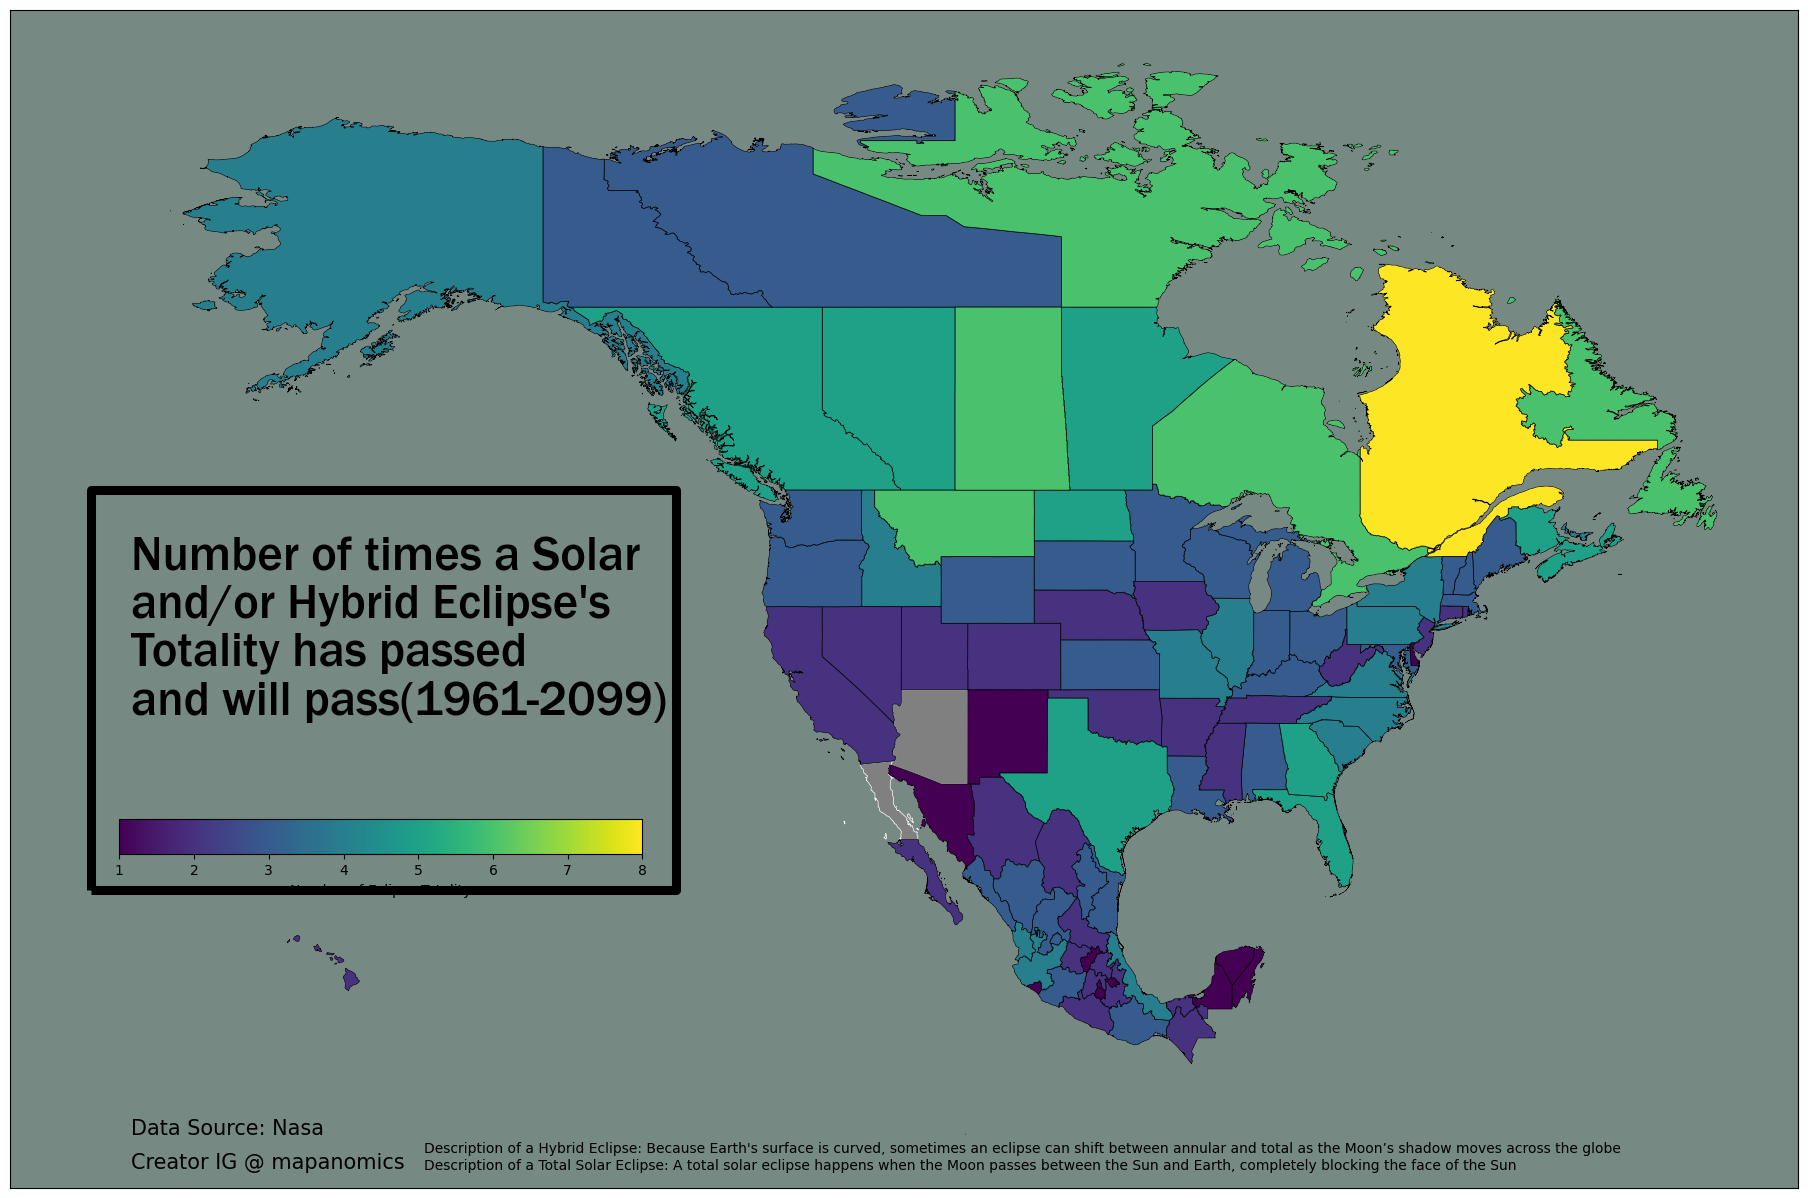

In [18]:
leg_args = {'shrink': 0.27, 
            'label':'Number of Eclipse Totality',
            'orientation':'horizontal',
            'fraction':0.5,
            'aspect': 15,
            'pad': -0.4, # Deals with how up or down the colorbar is from within the map. Negative values means its inside the map. Positive values the color is outiside map
            'anchor': (0.13,0.75)} # Deals with how left or right the color bar is. The more closer the left value is to 1, the more right it is.

ax= north_america.plot(color='grey', edgecolor='white',linewidth=0.5,figsize=(25,17))
eclipse_clip_dissolved.plot(ax=ax, 
                            column='Eclipse Type',
                            k=5,
                            cmap='viridis',
                            linewidth=0.5,
                            edgecolor='black', 
                            legend_kwds=leg_args,
                            legend='True')
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,25),(-175,49),(-131, 49),(-131,25)])
box= gpd.GeoDataFrame(geometry=[polygon], crs=eclipse_clip_dissolved.crs)


box.boundary.plot(ax = ax, color="black",linewidth= 6.5)


# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive

ax.annotate("Number of times a Solar\nand/or Hybrid Eclipse's\nTotality has passed\nand will pass(1961-2099)",
            xy=(-172,35), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=35, color='black')
ax.set_facecolor('#768983')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')


#----Turning off the grid 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)



plt.savefig('Chloropleth Map Number of Eclipses.png',pad_inches = 3,facecolor ="black",dpi=60)

In [66]:
eclipse_clip.sort_values('Eclipse Date').head(50)

,name,country,stateabb,geometry,index_right,Id,Eclipse Date,Eclipse Type,name_1
59,Nova Scotia,CAN,CA-NS,"MULTIPOLYGON (((-65.61059 43.42817, -65.62563 ...",8,0,1970 03 07,Total Solar Eclipse,Nova Scotia
56,North Carolina,USA,US-NC,"MULTIPOLYGON (((-77.94653 33.90360, -77.96239 ...",8,0,1970 03 07,Total Solar Eclipse,North Carolina
37,Maryland,USA,US-MD,"MULTIPOLYGON (((-75.99454 38.02191, -75.98399 ...",8,0,1970 03 07,Total Solar Eclipse,Maryland
62,Oaxaca,MEX,MX-OAX,"MULTIPOLYGON (((-94.34549 16.16315, -94.29263 ...",8,0,1970 03 07,Total Solar Eclipse,Oaxaca
79,South Carolina,USA,US-SC,"MULTIPOLYGON (((-80.71323 32.26322, -80.69686 ...",8,0,1970 03 07,Total Solar Eclipse,South Carolina
81,Tabasco,MEX,MX-TAB,"MULTIPOLYGON (((-93.80427 18.31670, -93.80928 ...",8,0,1970 03 07,Total Solar Eclipse,Tabasco
87,Veracruz,MEX,MX-VER,"MULTIPOLYGON (((-97.42105 21.25594, -97.42801 ...",8,0,1970 03 07,Total Solar Eclipse,Veracruz
89,Virginia,USA,US-VA,"MULTIPOLYGON (((-75.91420 36.55071, -75.94230 ...",8,0,1970 03 07,Total Solar Eclipse,Virginia
55,Newfoundland and Labrador,CAN,CA-NL,"MULTIPOLYGON (((-55.88771 47.29489, -55.87092 ...",8,0,1970 03 07,Total Solar Eclipse,Newfoundland and Labrador
22,Georgia,USA,US-GA,"MULTIPOLYGON (((-81.45503 30.73386, -81.46166 ...",8,0,1970 03 07,Total Solar Eclipse,Georgia


# Map of the last eclipse for each state

In [78]:
eclipse_clip[eclipse_clip['Eclipse Date'] < '2024 01 01'].sort_values('Eclipse Date').tail(50)

,name,country,stateabb,geometry,index_right,Id,Eclipse Date,Eclipse Type,name_1
8,British Columbia,CAN,CA-BC,"MULTIPOLYGON (((-123.24901 48.77741, -123.2495...",13,0,1990 07 22,Total Solar Eclipse,British Columbia
3,Alberta,CAN,CA-AB,"POLYGON ((-110.00000 60.00000, -110.00000 59.9...",13,0,1990 07 22,Total Solar Eclipse,Alberta
2,Alaska,USA,US-AK,"MULTIPOLYGON (((-162.40514 54.39057, -162.4016...",13,0,1990 07 22,Total Solar Eclipse,Alaska
70,Quebec,CAN,CA-QC,"MULTIPOLYGON (((-73.93806 45.31025, -73.94831 ...",13,0,1990 07 22,Total Solar Eclipse,Quebec
0,Aguascalientes,MEX,MX-AGU,"POLYGON ((-101.88791 21.94428, -101.88834 21.9...",14,0,1991 07 11,Total Solar Eclipse,Aguascalientes
87,Veracruz,MEX,MX-VER,"MULTIPOLYGON (((-97.42105 21.25594, -97.42801 ...",14,0,1991 07 11,Total Solar Eclipse,Veracruz
46,Mexico,MEX,MX-MEX,"POLYGON ((-98.56587 19.64038, -98.56775 19.638...",14,0,1991 07 11,Total Solar Eclipse,Mexico
47,Nayarit,MEX,MX-NAY,"MULTIPOLYGON (((-105.75076 22.53461, -105.7576...",14,0,1991 07 11,Total Solar Eclipse,Nayarit
62,Oaxaca,MEX,MX-OAX,"MULTIPOLYGON (((-94.34549 16.16315, -94.29263 ...",14,0,1991 07 11,Total Solar Eclipse,Oaxaca
69,Puebla,MEX,MX-PUE,"POLYGON ((-96.73383 18.42173, -96.73383 18.421...",14,0,1991 07 11,Total Solar Eclipse,Puebla


In [19]:
eclipse_clip_last_eclipse = eclipse_clip[eclipse_clip['Eclipse Date'] < '2024 01 01'].dissolve(by="name", 
                                                  aggfunc= {'Eclipse Date':'max'})
eclipse_clip_last_eclipse.tail(50)

,geometry,Eclipse Date
name,,
Hawaii,"MULTIPOLYGON (((-155.58111 20.12417, -155.5631...",1991 07 11
Hidalgo,"POLYGON ((-98.00419 20.58084, -98.00323 20.565...",1991 07 11
Idaho,"POLYGON ((-116.04966 48.99251, -116.04942 48.9...",2017 08 21
Illinois,"POLYGON ((-87.80265 42.49554, -87.80260 42.495...",2017 08 21
Iowa,"POLYGON ((-91.21902 43.50241, -91.21986 43.495...",2017 08 21
Jalisco,"POLYGON ((-102.74843 21.73041, -102.73179 21.7...",1991 07 11
Kansas,"POLYGON ((-95.31105 40.00140, -95.31128 40.000...",2017 08 21
Kentucky,"POLYGON ((-82.59238 38.41809, -82.59405 38.410...",2017 08 21
Manitoba,"POLYGON ((-94.81180 59.99899, -94.84031 59.984...",1990 07 22


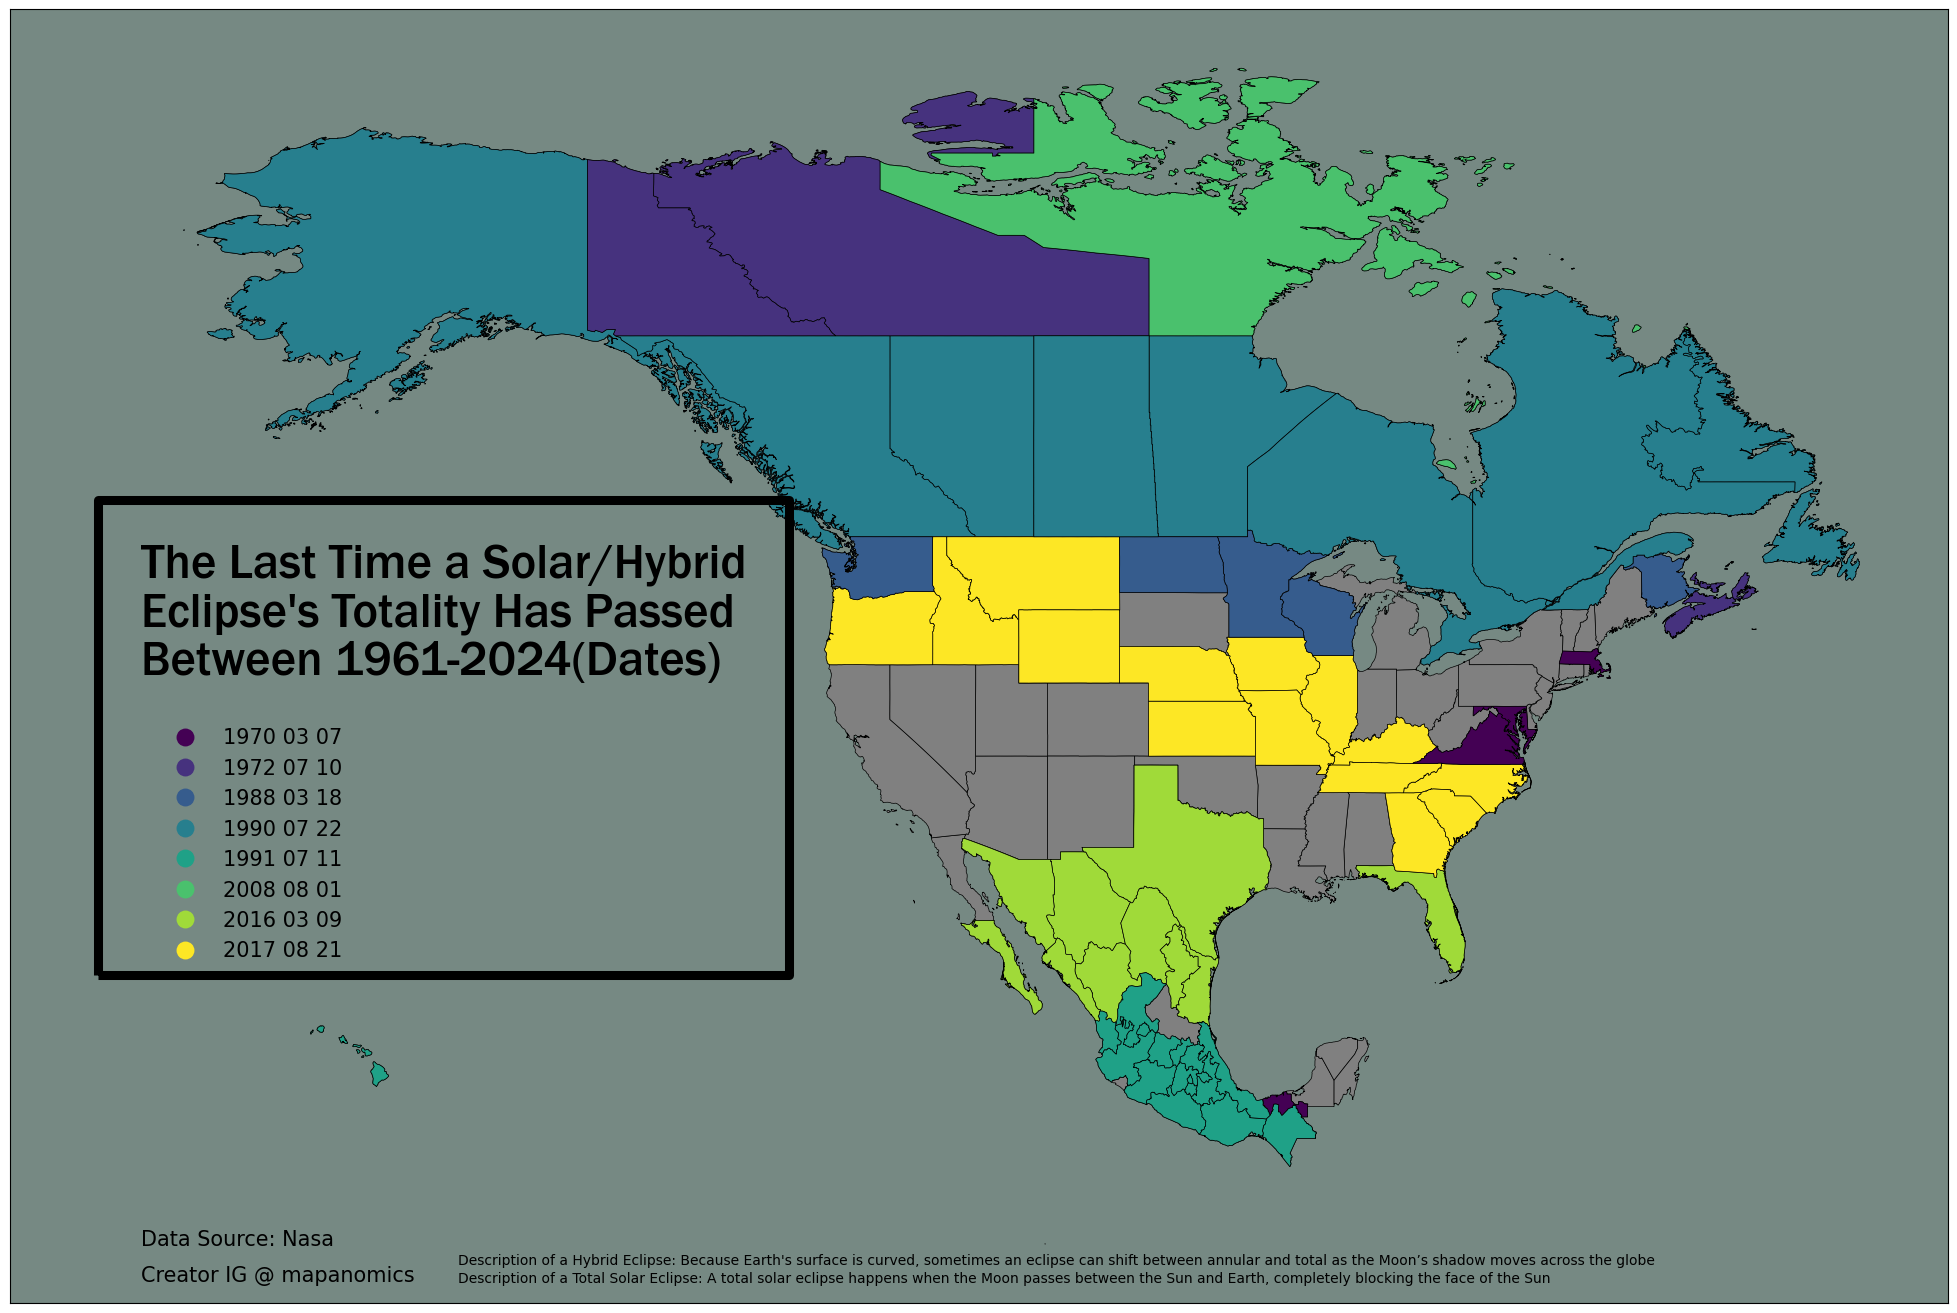

In [20]:
ax= north_america.plot(color='grey', edgecolor='black',linewidth=0.5,figsize=(25,17))

map=eclipse_clip_last_eclipse.plot(ax=ax,
                            column='Eclipse Date',
                            cmap='viridis',
                            linewidth=0.5,
                            edgecolor='black',
                            legend='True',
                            legend_kwds={
                            'loc':'lower left', 
                            'bbox_to_anchor':(0.07, 0.25, 0.02, 0.95),
                            'markerscale':1.29, 
                            'title_fontsize':'medium', 
                            'fontsize':'medium',
                            'edgecolor':'#768983',
                            'facecolor': '#768983',
                            'prop': {'size': 15}})

leg1 = map.get_legend()
#leg1.set_title("Dates (Year/Month/Date)")


# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,25),(-175,51),(-127, 51),(-127,25)])
box= gpd.GeoDataFrame(geometry=[polygon], crs=eclipse_clip_dissolved.crs)


box.boundary.plot(ax = ax, color="black",linewidth= 6.5)


# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive

ax.annotate("The Last Time a Solar/Hybrid\nEclipse's Totality Has Passed\nBetween 1961-2024(Dates)",
            xy=(-172,41), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=35, color='black')
ax.set_facecolor('#768983')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')


#----Turning off the grid 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)



plt.savefig('Last Eclipses.png',pad_inches = 3,facecolor ="black",dpi=60)


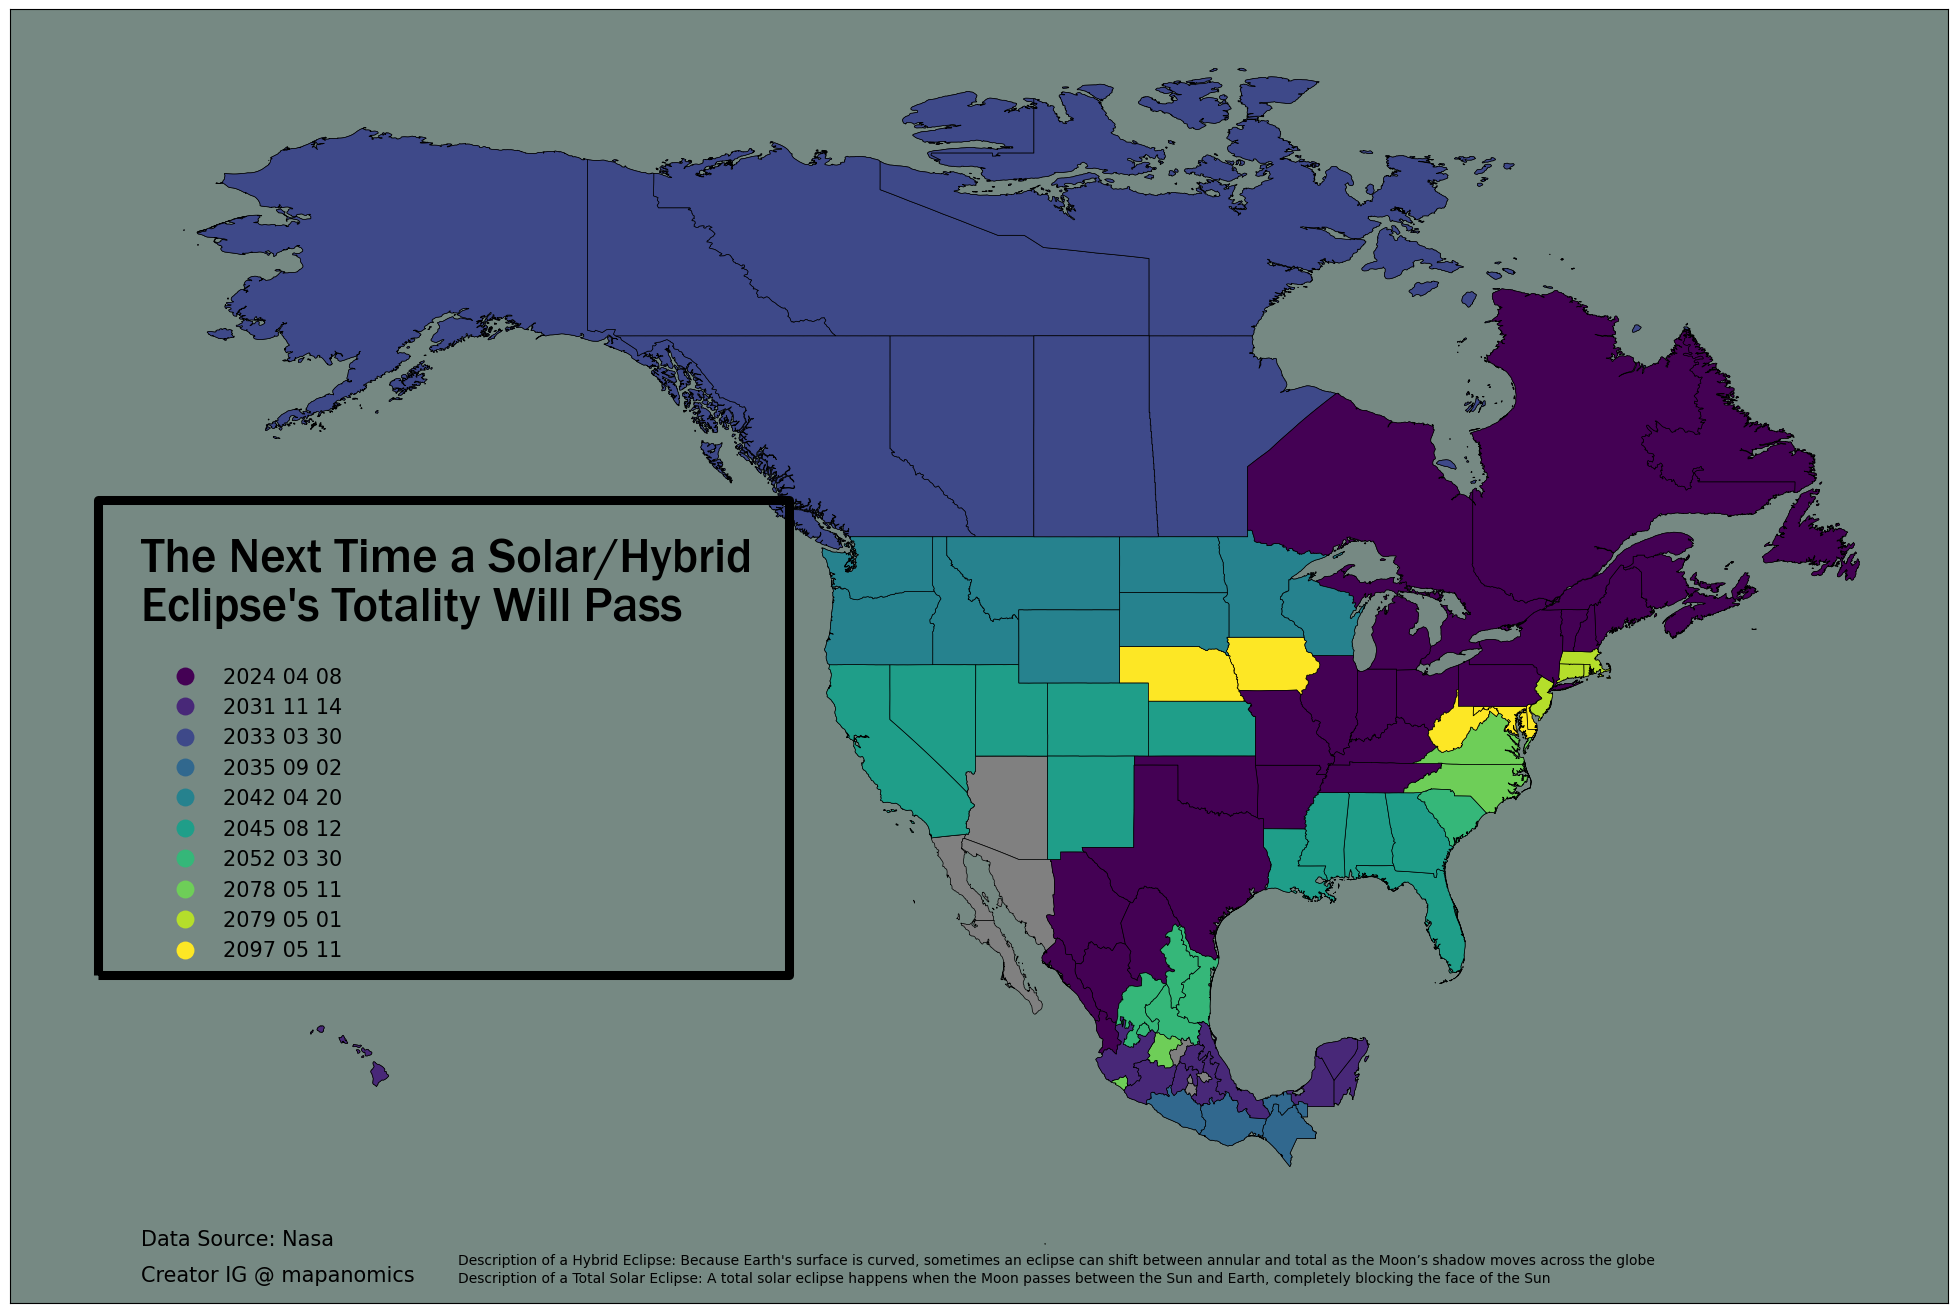

In [21]:
eclipse_clip_next_eclipse = eclipse_clip[eclipse_clip['Eclipse Date'] > '2024 01 01'].dissolve(by="name", 
                                                  aggfunc= {'Eclipse Date':'min'})
eclipse_clip_next_eclipse.tail(50)

ax= north_america.plot(color='grey', edgecolor='black',linewidth=0.5,figsize=(25,17))

map=eclipse_clip_next_eclipse.plot(ax=ax,
                            column='Eclipse Date',
                            cmap='viridis',
                            linewidth=0.5,
                            edgecolor='black',
                            legend='True',
                            legend_kwds={
                            'loc':'lower left', 
                            'bbox_to_anchor':(0.07, 0.25, 0.02, 0.95),
                            'markerscale':1.29, 
                            'title_fontsize':'medium', 
                            'fontsize':'medium',
                            'edgecolor':'#768983',
                            'facecolor': '#768983',
                            'prop': {'size': 15}})

leg1 = map.get_legend()
#leg1.set_title("Dates (Year/Month/Date)")


# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive
polygon = Polygon([(-175,25),(-175,51),(-127, 51),(-127,25)])
box= gpd.GeoDataFrame(geometry=[polygon], crs=eclipse_clip_dissolved.crs)


box.boundary.plot(ax = ax, color="black",linewidth= 6.5)


# Making yes/no polygon legend
# NOTE: the convention for polygon points is (Long, Lat)....counterintuitive

ax.annotate("The Next Time a Solar/Hybrid\nEclipse's Totality Will Pass",
            xy=(-172,44), xycoords='data', fontfamily='Franklin Gothic Medium', 
            horizontalalignment='left', verticalalignment='bottom', fontsize=35, color='black')
ax.set_facecolor('#768983')
ax.annotate('Data Source: Nasa',xy=(-172,10), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Creator IG @ mapanomics',xy=(-172,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=15, color='black')
ax.annotate('Description of a Total Solar Eclipse: A total solar eclipse happens when the Moon passes between the Sun and Earth, completely blocking the face of the Sun',xy=(-150,8), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')
ax.annotate("Description of a Hybrid Eclipse: Because Earth's surface is curved, sometimes an eclipse can shift between annular and total as the Moon’s shadow moves across the globe",xy=(-150,9), xycoords='data', horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')


#----Turning off the grid 
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)



plt.savefig('Next Eclipse.png',pad_inches = 3,facecolor ="black",dpi=60)
